In [1]:
from layer import *

from __future__ import division
import random
import math
import numpy as np
import pandas as pd
import time

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(load_iris().data)
y = np.vectorize(lambda x: 1 if(x>0) else 0)(load_iris().target).astype(np.float64)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=10, stratify=y)
X_train = np.transpose(X_train)
X_test = np.transpose(X_test)
y_train = y_train.reshape(1,-1)
y_test = y_test.reshape(1,-1)

In [2]:
global global_best_position
global global_best_cost

class Particle:
    global input_size
    global computational_layer
    global ouput_layer
    
    def __init__(self, dimensions):
        self.position = np.random.random((dimensions,))
        self.dimensions = dimensions
        self.position_bounds = [-10,10]
        self.velocity_bounds = [(self.position_bounds[1]-self.position_bounds[0])/2, -1 * self.position_bounds[1]]
        self.velocity = np.random.random((dimensions,))
        self.best_position = np.random.random((dimensions,))
        self.best_cost, _ = forward_pass_weights_bin(self.best_position,X_train, y_train ,input_size, computational_layer, output_layer)
        
        self.c = [2.05,2.05]
        self.learning_rate = 0.8
        
    def evaluate(self, cost):
        if(cost<self.best_cost):
            self.best_cost = cost
            self.best_position = self.position
    
    def update_velocity(self):
        self.velocity = self.learning_rate * (self.velocity) + (self.c[0]*random.random()*(self.best_position - self.position)) + (self.c[1]*random.random()*(global_best_position - self.position))
        
    def update_position(self):
        self.position = self.position + self.velocity
        self.position = np.vectorize(lambda z: self.position_bounds[1] if z > self.position_bounds[1] else float(z)) (self.position)
        self.position = np.vectorize(lambda z: self.position_bounds[0] if z < self.position_bounds[0] else float(z)) (self.position)
        

In [3]:
n_iterations = 25
n_population = 100

input_size = 4
computational_layer = 5
output_layer = 1
dimensions = calculate_dimensions(input_size, computational_layer, output_layer)

particles = [Particle(dimensions = dimensions) for x in range(n_population)]
global_best_position = np.random.random((dimensions,))
global_best_cost, _ = forward_pass_weights_bin(global_best_position,X_train, y_train ,input_size, computational_layer, output_layer)

cost_list = []

In [4]:
start = time.time()

for iteration in range(n_iterations):
    
    for particle in particles:
        particle.update_velocity()
        particle.update_position()

    for particle in particles:
        
        cost, _ = forward_pass_weights_bin(particle.position,X_train, y_train ,input_size, computational_layer, output_layer)
        
        particle.evaluate(cost)
        if(cost<global_best_cost):
            global_best_cost = cost
            global_best_position = particle.position
        
    cost_list.append(global_best_cost)
    

end = time.time()
print(end - start)

1.2120749950408936


In [5]:
cost, output = forward_pass_weights_bin(global_best_position,X_test,y_test,input_size, computational_layer, output_layer)
print(cost)


0.43989018519879713


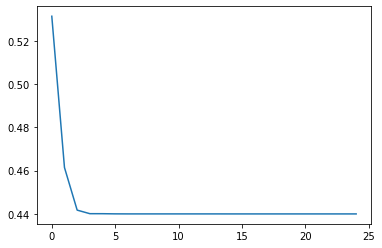

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x=range(n_iterations), y = cost_list)